In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('D:\SLIIT\Y2\AI_ML\project\Project\data\survey_cleaned_II.csv')

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Vivobook\AppData\Local\Temp\ipykernel_680\1108322250.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('D:\SLIIT\Y2\AI_ML\project\Project\data\survey_cleaned_II.csv')


In [85]:
# Remove rows with invalid Age values (not in [0, 100] or missing)
if 'Age' in df.columns:
    valid = df['Age'].between(0, 100) & df['Age'].notnull()
    df = df.loc[valid].reset_index(drop=True)
    print(f"Rows remaining after removing invalid Age: {len(df)}")
else:
    print("'Age' column not found.")

Rows remaining after removing invalid Age: 1254


In [86]:
numeric_cols = ['Age', 'no_employees']

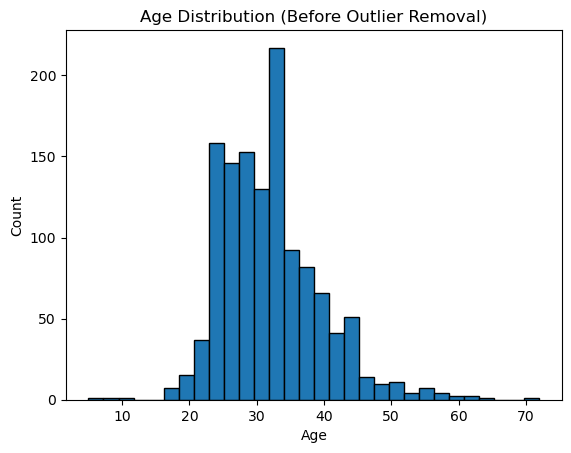

In [87]:
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution (Before Outlier Removal)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='treatment'>

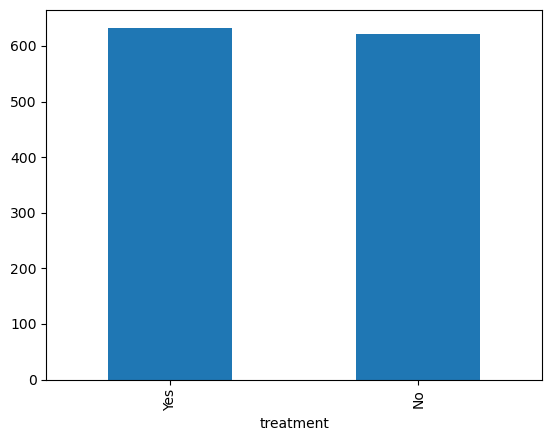

In [88]:
df['treatment'].value_counts().plot(kind='bar')

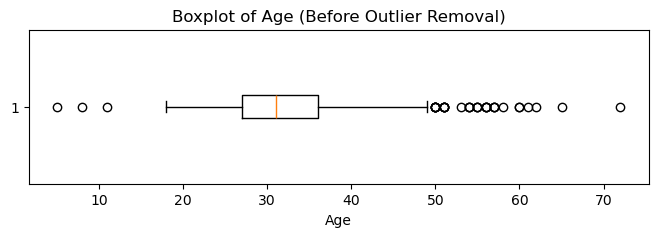

In [89]:
plt.figure(figsize=(8, 2))
plt.boxplot(df['Age'], vert=False)
plt.title('Boxplot of Age (Before Outlier Removal)')
plt.xlabel('Age')
plt.show()

In [90]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound = max(lower_bound, 10)   # Age should be at least 10
upper_bound = min(upper_bound, 100)  # Age should be at most 100

In [91]:
df_no_outlier = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

In [92]:
print("Number of rows before removing outliers:", len(df))
print("Number of rows after removing outliers:", len(df_no_outlier))
print("Outliers removed:", len(df) - len(df_no_outlier))

Number of rows before removing outliers: 1254
Number of rows after removing outliers: 1219
Outliers removed: 35


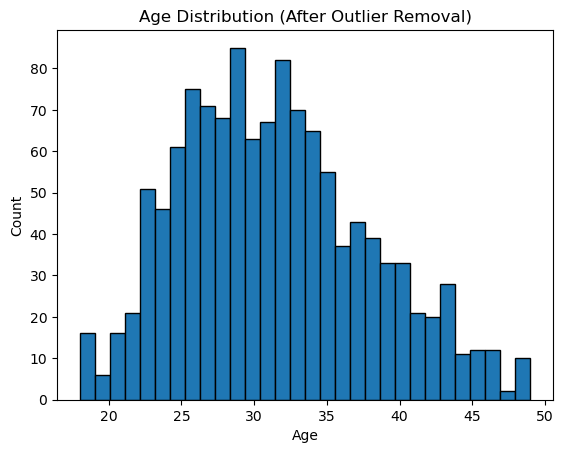

In [93]:
plt.hist(df_no_outlier['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution (After Outlier Removal)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

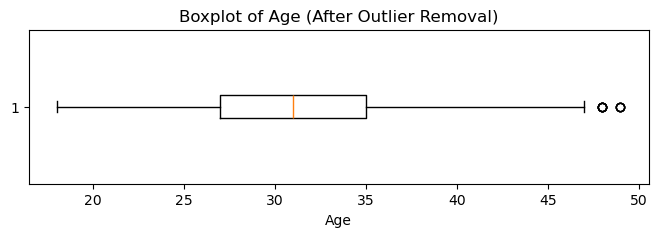

In [94]:
plt.figure(figsize=(8, 2))
plt.boxplot(df_no_outlier['Age'], vert=False)
plt.title('Boxplot of Age (After Outlier Removal)')
plt.xlabel('Age')
plt.show()

<Axes: xlabel='treatment'>

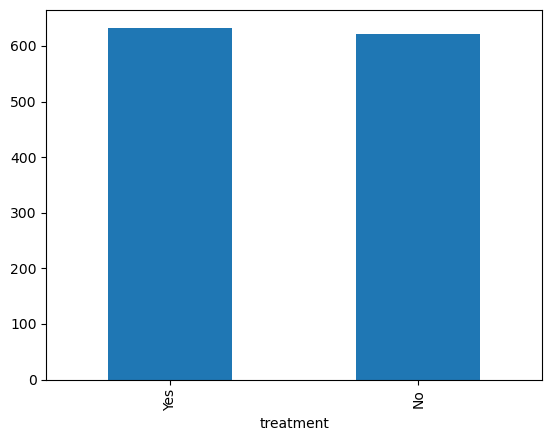

In [95]:
df['treatment'].value_counts().plot(kind='bar')

In [96]:
df_no_outlier.to_csv('D:\SLIIT\Y2\AI_ML\project\Project\data\survey_no_outliers.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Vivobook\AppData\Local\Temp\ipykernel_680\1130815800.py:1: SyntaxWarning: invalid escape sequence '\S'
  df_no_outlier.to_csv('D:\SLIIT\Y2\AI_ML\project\Project\data\survey_no_outliers.csv', index=False)


In [97]:
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72],
      dtype=int64)